# CME538 - Introduction to Data Science
## Lecture 9.3 - Feature Selection and Hyper-Parameter Tuning

## Setup Notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [46]:
n_rows = 100
n_features = 5000
X = pd.DataFrame(np.random.uniform(low=0, 
                                   high=10, 
                                   size=(n_rows, n_features)))
y = pd.DataFrame(np.array([np.random.rand() > .5 
                           for _ in range(n_rows)]).astype(int)) 

In [47]:
X.head()    

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,4.685346,4.621338,0.421401,8.220299,7.170496,3.831672,0.274757,6.277240,9.585150,7.820659,...,9.233566,6.461299,4.642871,4.375170,1.437501,6.770450,5.706096,2.998815,9.863649,6.426377
1,4.873630,1.367966,3.281150,5.496731,5.710099,3.171971,0.595500,3.795774,3.326330,4.874029,...,2.705768,2.944610,6.664836,9.986188,6.151102,2.252349,2.676394,3.455338,7.086854,4.904004
2,9.561681,0.846882,7.453997,0.623928,1.204593,5.151973,0.087356,7.042019,4.175005,2.495240,...,1.622548,2.847801,5.158267,2.873063,7.017836,7.866978,3.770479,9.344670,6.123987,6.830487
3,4.601852,5.222871,0.106468,8.830091,2.126838,6.914440,3.331835,8.692605,6.750796,0.912625,...,3.900523,4.696055,6.736360,8.467704,3.214503,0.729818,9.402131,0.511188,1.932622,5.136917
4,3.959263,6.515789,3.701864,5.011036,6.079014,9.290182,6.750210,3.564404,2.019154,0.695808,...,8.969227,7.975564,0.591235,4.857502,5.660168,5.819351,6.421546,3.864785,4.388814,1.537731


In [48]:
y.head()

,0
0,1
1,1
2,1
3,0
4,1


# Feature Selection Outside CV Loop

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

# Select the 5 best features from X, y
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new = pd.DataFrame(X_new)

# Setup
model = LogisticRegression(penalty='none')
five_fold = KFold(n_splits=5, random_state=0)
accuracy_scores = []

# Iterature thought cv-folds
for train_index, val_index in five_fold.split(X_new):
    
    # Fit model
    model.fit(X_new.iloc[train_index, :], 
              y.iloc[train_index])

    # Append accuracy scores
    accuracy_scores.append(
        accuracy_score(y.iloc[val_index], 
                       model.predict(X_new.iloc[val_index, :])))

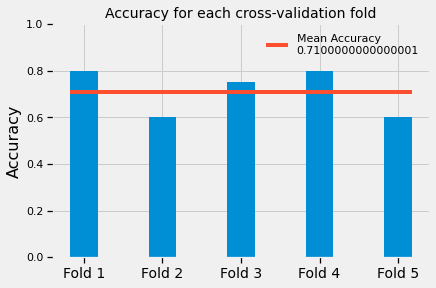

In [6]:
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, accuracy_scores, width)
ax.plot([x[0]-width/2, x[-1]+width/2], [np.mean(accuracy_scores), np.mean(accuracy_scores)], lw=4, color='#fc4f30', label='Mean Accuracy\n{}'.format(np.mean(accuracy_scores)))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_ylim([0, 1.])
ax.set_title('Accuracy for each cross-validation fold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(frameon=False);

# Feature Selection Inside CV Loop

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2

# Setup
model = LogisticRegression(penalty='none')
five_fold = KFold(n_splits=5, random_state=0)
accuracy_scores = []

# Iterature thought cv-folds
for train_index, val_index in five_fold.split(X_new):
    
    # Select the 5 best features from X, y
    select = SelectKBest(chi2, k=2).fit(X.iloc[train_index, :], 
                                        y.iloc[train_index])
    
    # Create reduced Feature set
    X_new = X.loc[:, select.get_support()]
    print('Selected features: {}'.format(X_new.columns.tolist()))

    # Fit model
    model.fit(X_new.iloc[train_index, :], 
              y.iloc[train_index])

    # Append accuracy scores
    accuracy_scores.append(
        accuracy_score(y.iloc[val_index], 
                       model.predict(X_new.iloc[val_index, :])))

Selected features: [1237, 4382]
Selected features: [937, 2311]
Selected features: [3384, 4112]
Selected features: [4382, 4578]
Selected features: [674, 4055]


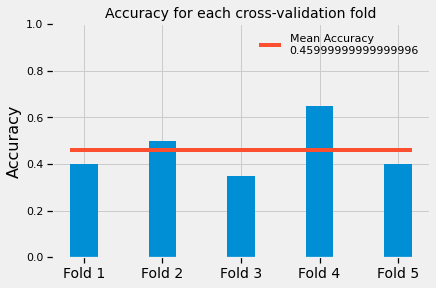

In [8]:
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, accuracy_scores, width)
ax.plot([x[0]-width/2, x[-1]+width/2], [np.mean(accuracy_scores), np.mean(accuracy_scores)], lw=4, color='#fc4f30', label='Mean Accuracy\n{}'.format(np.mean(accuracy_scores)))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_ylim([0, 1.])
ax.set_title('Accuracy for each cross-validation fold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(frameon=False);

# Diabetes Dataset

In [36]:
diabetes = pd.read_csv('diabetes.csv')
diabetes = diabetes.drop(['DiabetesPedigreeFunction'], axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [37]:
X = diabetes.iloc[:, 0:7]
y = diabetes.iloc[:, 7]

## Feature Selection Inside CV Loop

In [38]:
# Setup
model = LogisticRegression(penalty='none')
five_fold = KFold(n_splits=5, random_state=0)
accuracy_scores = []

# Iterature thought cv-folds
for train_index, val_index in five_fold.split(X_new):
    
    # Select the 5 best features from X, y
    select = SelectKBest(chi2, k=4).fit(X.iloc[train_index, :], 
                                        y.iloc[train_index])
    
    # Create reduced Feature set
    X_new = X.loc[:, select.get_support()]
    print('Selected features: {}'.format(X_new.columns.tolist()))

    # Fit model
    model.fit(X_new.iloc[train_index, :], 
              y.iloc[train_index])

    # Append accuracy scores
    accuracy_scores.append(
        accuracy_score(y.iloc[val_index], 
                       model.predict(X_new.iloc[val_index, :])))

Selected features: ['Pregnancies', 'Glucose', 'Insulin', 'Age']
Selected features: ['Glucose', 'Insulin', 'BMI', 'Age']
Selected features: ['Glucose', 'Insulin', 'BMI', 'Age']
Selected features: ['Glucose', 'Insulin', 'BMI', 'Age']
Selected features: ['Glucose', 'Insulin', 'BMI', 'Age']


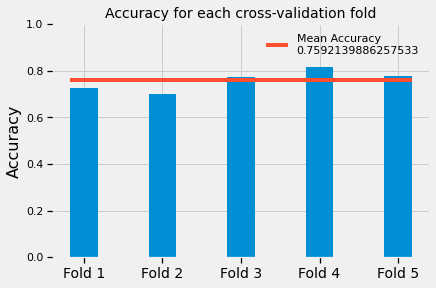

In [39]:
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, accuracy_scores, width)
ax.plot([x[0]-width/2, x[-1]+width/2], [np.mean(accuracy_scores), np.mean(accuracy_scores)], lw=4, color='#fc4f30', label='Mean Accuracy\n{}'.format(np.mean(accuracy_scores)))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_ylim([0, 1.])
ax.set_title('Accuracy for each cross-validation fold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(frameon=False);

## Feature Selection Outside CV Loop

In [57]:
# Select the 5 best features from X, y
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new = pd.DataFrame(X_new)

# Setup
model = LogisticRegression(penalty='none')
five_fold = KFold(n_splits=5, random_state=0)
accuracy_scores = []

# Iterature thought cv-folds
for train_index, val_index in five_fold.split(X_new):
    
    # Fit model
    model.fit(X_new.iloc[train_index, :], 
              y.iloc[train_index])

    # Append accuracy scores
    accuracy_scores.append(
        accuracy_score(y.iloc[val_index], 
                       model.predict(X_new.iloc[val_index, :])))

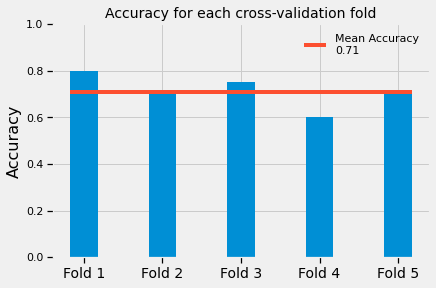

In [58]:
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, accuracy_scores, width)
ax.plot([x[0]-width/2, x[-1]+width/2], [np.mean(accuracy_scores), np.mean(accuracy_scores)], lw=4, color='#fc4f30', label='Mean Accuracy\n{}'.format(np.mean(accuracy_scores)))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_ylim([0, 1.])
ax.set_title('Accuracy for each cross-validation fold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(frameon=False);

In [60]:
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
print(model.coef_)

[[-0.28241143  0.21456956]]


In [63]:
print(model.intercept_)

[0.14600557]


# Hyper-Parameters

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [67]:
diabetes = pd.read_csv('diabetes.csv')
diabetes = diabetes.drop(['DiabetesPedigreeFunction'], axis=1)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [70]:
X = diabetes[['Glucose', 'Insulin', 'BMI']]
X.head()

,Glucose,Insulin,BMI
0,148,0,33.6
1,85,0,26.6
2,183,0,23.3
3,89,94,28.1
4,137,168,43.1


In [72]:
y = diabetes[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [133]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

cv = KFold(n_splits=5)

param_grid = {'penalty': ('l1', 'l2', 'none'),
              'fit_intercept': (True, False),
              'C' : (0.001, 0.01, 0.1, 1, 10, 100), 
              'class_weight': (None, 'balanced')}

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy',
                  cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100),
                         'class_weight': (None, 'balanced'),
                         'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2', 'none')},
             scoring='accuracy')

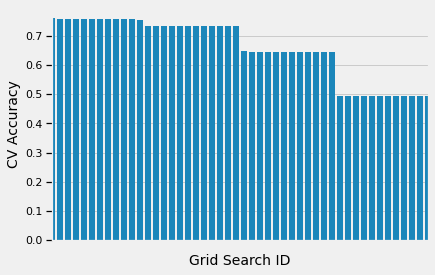

In [134]:
df = pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', 
                                               ascending=False).reset_index(drop=True)
ax = sns.barplot(x=df.index, y='mean_test_score', data=df, color='#008fd5')
ax.axes.xaxis.set_ticklabels([])
plt.tick_params(bottom=False)
ax.set_xlabel('Grid Search ID', fontsize=14)
ax.set_ylabel('CV Accuracy', fontsize=14)
ax.set_xlim([0, 47]);

In [135]:
df.shape

(72, 17)

In [168]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

cv = KFold(n_splits=5)

param_distributions = {'penalty': ('l1', 'l2', 'none'),
                       'fit_intercept': (True, False),
                       'C' : loguniform(1e-3, 1e2), 
                       'class_weight': (None, 'balanced')}

gs = RandomizedSearchCV(estimator=model, 
                        param_distributions=param_distributions, 
                        n_iter=72,
                        scoring='accuracy',
                        cv=cv)
gs.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=72,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AA2CCFB50>,
                                        'class_weight': (None, 'balanced'),
                                        'fit_intercept': (True, False),
                                        'penalty': ('l1', 'l2', 'none')},
                   scoring='accuracy')

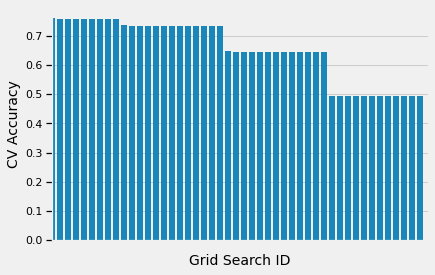

In [169]:
df = pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', 
                                               ascending=False).reset_index(drop=True)
ax = sns.barplot(x=df.index, y='mean_test_score', data=df, color='#008fd5')
ax.axes.xaxis.set_ticklabels([])
plt.tick_params(bottom=False)
ax.set_xlabel('Grid Search ID', fontsize=14)
ax.set_ylabel('CV Accuracy', fontsize=14)
ax.set_xlim([0, 47]);

In [171]:
df.iloc[45:50]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.006383,0.000811,0.001596,0.000489,12.1613,balanced,False,l2,"{'C': 12.161291163406654, 'class_weight': 'bal...",0.487013,0.538961,0.506494,0.490196,0.45098,0.494729,0.028597,38
46,0.008979,0.001780,0.002596,0.000480,0.153582,balanced,False,l2,"{'C': 0.15358174126746088, 'class_weight': 'ba...",0.487013,0.538961,0.506494,0.490196,0.45098,0.494729,0.028597,38
47,0.000791,0.000396,0.000000,0.000000,33.5844,None,False,l1,"{'C': 33.58444996043326, 'class_weight': None,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
48,0.000798,0.000746,0.000000,0.000000,0.00843731,balanced,True,l1,"{'C': 0.00843731253968914, 'class_weight': 'ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
49,0.000598,0.000488,0.000000,0.000000,0.00857619,None,False,l1,"{'C': 0.00857618882438179, 'class_weight': Non...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,58


In [141]:
df.shape

(30, 17)